Source of the  explanation: https://towardsdatascience.com/gaussian-mixture-models-explained-6986aaf5a95

A Gaussian Mixture Model is a function that is comprised of several Gaussians, each identified by k ∈ {1,…, K}, where K is the number of clusters of our dataset. Each Gaussian k in the mixture is comprised of the following parameters: 

 * A mean μ that defines its centre.
 * A covariance Σ that defines its width. This would be equivalent to the dimensions of an ellipsoid in a multivariate scenario. 
 * A mixing probability π that defines how big or small the Gaussian function will be.



Simply speaking, GMM is a soft assignment for data points and the steps GMM is :
1. initialize  $\gamma(z_{nk})$
2. use $\gamma(z_{nk})$ to calculate/update $\pi_k$, $\mu_k$, and $\Sigma_k$   --> Expectation
3. update $\gamma(z_{nk})$ based on $\pi_k$, $\mu_k$, and $\Sigma_k$           --> Maximization
5. repeat 2nd and 3rd part until convergence, which means that $\gamma(z_{nk})$ does not change


## Import the libraries that will be used and get the defined data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data needed, sometimes data need to be preprocessed

In [2]:
def load(txt_path):
    with open(txt_path, 'r') as f:
        content = f.readlines()
    X = []
    for each_line in content:
        x = each_line.replace('\n', '')
        x0 = float(x.split(',')[0])
        x1 = float(x.split(',')[1])
        x = [x0, x1]
        X.append(x)
    X_M = np.array(X)
    return X_M

txt_path = 'data/clusters.txt' # data stored in the data directory
data = load(txt_path)

print(f'data.shape: {data.shape}')
print(f'example of a data point: {data[0]}')

data.shape: (150, 2)
example of a data point: [-1.86133124 -2.99168277]


## First part: initialize  params

In [3]:
def random_num(k):
    generate_list = [np.random.rand() for i in range(k)]
    add_up = sum(generate_list)
    generate_list = [i/add_up for i in generate_list] 
    return generate_list

def initialize_param(data,k):
    clusters = []
    sample_num = data.shape[0]  # 150   
    feature_num = data.shape[1]  # 2  
    
    gamma = np.zeros((sample_num,k)) # (150,3) 
    # random generate 150 numbers and they add up to 1
    for i in range(sample_num):
        gamma_nk = random_num(k)
        gamma[i] = np.array(gamma_nk)
    
    mu_k = np.zeros(feature_num) # (3,2)
    cov_k = []
    pi_k = 0 # each cluster has the same probability 
    
    gamma_nk = gamma
    
    
    for i in range(k):
        clusters.append({
            'pi_k':pi_k,
            'mu_k': mu_k,
            'cov_k': cov_k,
            'gamma_nk':gamma[:,i]
        })
        
    return clusters

clusters = initialize_param(data,3)

In [4]:
clusters

[{'pi_k': 0,
  'mu_k': array([0., 0.]),
  'cov_k': [],
  'gamma_nk': array([0.32376834, 0.43412696, 0.41013627, 0.26184631, 0.34914708,
         0.31380753, 0.46142356, 0.30245588, 0.22728085, 0.40788199,
         0.39781332, 0.35884923, 0.4663183 , 0.52621122, 0.10901005,
         0.30169495, 0.08578983, 0.33073674, 0.62891249, 0.39058391,
         0.11778123, 0.2166316 , 0.15555383, 0.26349119, 0.29071242,
         0.68989832, 0.43631129, 0.15833545, 0.55301571, 0.30288444,
         0.1292082 , 0.00918927, 0.66114698, 0.0940571 , 0.4988283 ,
         0.43779364, 0.49084722, 0.60244819, 0.07564064, 0.39034748,
         0.2008751 , 0.48966848, 0.22192675, 0.57603975, 0.09985363,
         0.29202514, 0.57902549, 0.17007377, 0.59230237, 0.36181949,
         0.77162962, 0.32993235, 0.16118408, 0.55415292, 0.73073844,
         0.6300466 , 0.53612777, 0.4578852 , 0.46626077, 0.25434193,
         0.67262677, 0.49568884, 0.39235708, 0.50634112, 0.40503015,
         0.30964072, 0.47339213, 0.2

## Second part (Expectation): use $\gamma(z_{nk})$ to calculate/update $\pi_k$, $\mu_k$, and $\Sigma_k$ 

In [5]:
def update_gaussain_para(X, clusters):
    N = X.shape[0]
    D = X.shape[1]
    for cluster in clusters:
        cov_k = np.zeros((D, D)) #  2 x 2 
        gamma_nk = np.array(cluster['gamma_nk']).reshape(1,-1)
        # gamma_nk  (1,150)   ri1
        N_k = np.sum(gamma_nk) 
        # update pi
        pi_k = N_k / N    
        # update mu
        mu_k = gamma_nk.dot(X) / N_k 
        #update cov
        for j in range(N):
            diff = (X[j] - mu_k).reshape(-1, 1) # (2,1)     
            cov_k += gamma_nk[0][j] * diff.dot(diff.T)
        cov_k /= N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k
        
    return clusters

clusters = update_gaussain_para(data,clusters)

In [6]:
clusters[0]

{'pi_k': 0.3428195163635064,
 'mu_k': array([[1.216354  , 0.97812628]]),
 'cov_k': array([[8.99096071, 6.11213249],
        [6.11213249, 6.89143224]]),
 'gamma_nk': array([0.32376834, 0.43412696, 0.41013627, 0.26184631, 0.34914708,
        0.31380753, 0.46142356, 0.30245588, 0.22728085, 0.40788199,
        0.39781332, 0.35884923, 0.4663183 , 0.52621122, 0.10901005,
        0.30169495, 0.08578983, 0.33073674, 0.62891249, 0.39058391,
        0.11778123, 0.2166316 , 0.15555383, 0.26349119, 0.29071242,
        0.68989832, 0.43631129, 0.15833545, 0.55301571, 0.30288444,
        0.1292082 , 0.00918927, 0.66114698, 0.0940571 , 0.4988283 ,
        0.43779364, 0.49084722, 0.60244819, 0.07564064, 0.39034748,
        0.2008751 , 0.48966848, 0.22192675, 0.57603975, 0.09985363,
        0.29202514, 0.57902549, 0.17007377, 0.59230237, 0.36181949,
        0.77162962, 0.32993235, 0.16118408, 0.55415292, 0.73073844,
        0.6300466 , 0.53612777, 0.4578852 , 0.46626077, 0.25434193,
        0.67262677, 

## Third part: update $\gamma(z_{nk})$ based on $\pi_k$, $\mu_k$, and $\Sigma_k$        

In [7]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) 
                       * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

def update_gamma(X, clusters):    
    totals = np.zeros((X.shape[0], 1))
    
    for cluster in clusters:
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        gamma_nk = (pi_k * gaussian(X, mu_k, cov_k)).astype(np.float64)
        
        for i in range(X.shape[0]):
            totals[i] += gamma_nk[i]
        
        cluster['gamma_nk'] = gamma_nk
        cluster['totals'] = totals
        
    for cluster in clusters:
        cluster['gamma_nk'] /= cluster['totals']
        
    return clusters

## Repeat 2nd and 3rd part until convergence

In [8]:
k = 3 

clusters = initialize_param(data,k)

former_gamma_list = [i['gamma_nk'] for i in clusters]
former_gamma_list[0][0],former_gamma_list[1][0],former_gamma_list[2][0]

count = 0 
while True:
    # update gaussain_para
    update_gaussain_para(data, clusters) 
    # update gamma
    update_gamma(data, clusters) 
    
    count+=1
    if count >1000:
        break

## Visualize the points distribution

In [9]:
def get_likelihood(X, clusters):
    likelihood = []
    sample_likelihoods = np.log(np.array([cluster['totals'] for cluster in clusters]))
    return np.sum(sample_likelihoods), sample_likelihoods

def train_gmm(X, n_clusters, n_epochs):
    clusters = initialize_param(X, n_clusters)
    likelihoods = np.zeros((n_epochs, ))
    scores = np.zeros((X.shape[0], n_clusters))
    history = []

    for i in range(n_epochs):
        clusters_snapshot = []
        
        # This is just for our later use in the graphs
        for cluster in clusters:
            clusters_snapshot.append({
                'mu_k': cluster['mu_k'].copy(),
                'cov_k': cluster['cov_k'].copy()
            })
            
        history.append(clusters_snapshot)
      
        update_gaussain_para(X, clusters)
        update_gamma(X, clusters)

        likelihood, sample_likelihoods = get_likelihood(X, clusters)
        likelihoods[i] = likelihood

        print('Epoch: ', i + 1, 'Likelihood: ', likelihood)
        
    for i, cluster in enumerate(clusters):
        scores[:, i] = np.log(cluster['gamma_nk']).reshape(-1)
        
    return clusters, likelihoods, scores, sample_likelihoods, history

In [10]:
n_clusters = 3
n_epochs = 100

clusters, likelihoods, scores, sample_likelihoods, history = train_gmm(data, n_clusters, n_epochs)

Epoch:  1 Likelihood:  -2038.2112159760327
Epoch:  2 Likelihood:  -2038.0022383437085
Epoch:  3 Likelihood:  -2037.702427771081
Epoch:  4 Likelihood:  -2037.228976974348
Epoch:  5 Likelihood:  -2036.5422242684922
Epoch:  6 Likelihood:  -2035.662498655566
Epoch:  7 Likelihood:  -2034.677962571892
Epoch:  8 Likelihood:  -2033.7021423324163
Epoch:  9 Likelihood:  -2032.8166485220208
Epoch:  10 Likelihood:  -2032.0462658687404
Epoch:  11 Likelihood:  -2031.3690019212274
Epoch:  12 Likelihood:  -2030.7348688576092
Epoch:  13 Likelihood:  -2030.0729173594127
Epoch:  14 Likelihood:  -2029.2775518753554
Epoch:  15 Likelihood:  -2028.163002115781
Epoch:  16 Likelihood:  -2026.3544955172133
Epoch:  17 Likelihood:  -2023.0429104972566
Epoch:  18 Likelihood:  -2016.518230704195
Epoch:  19 Likelihood:  -2003.9254168598034
Epoch:  20 Likelihood:  -1983.7394750502579
Epoch:  21 Likelihood:  -1960.8899155612214
Epoch:  22 Likelihood:  -1945.5340298920369
Epoch:  23 Likelihood:  -1939.3943228462895
Epo

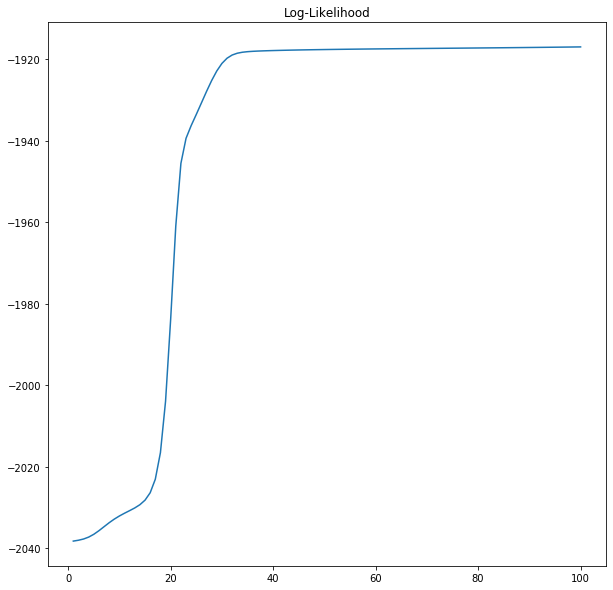

In [11]:
plt.figure(figsize=(10, 10))
plt.title('Log-Likelihood')
plt.plot(np.arange(1, n_epochs + 1), likelihoods)
plt.show()

In [13]:
import imageio
import matplotlib.animation as ani
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Ellipse
from PIL import Image
from sklearn.cluster import KMeans

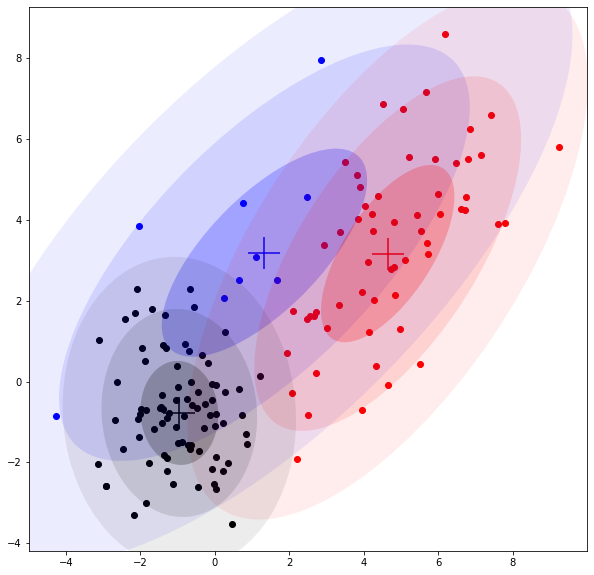

In [14]:
def create_cluster_animation(X, history, scores):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    colorset = ['blue', 'red', 'black']
    images = []
    
    for j, clusters in enumerate(history):
      
        idx = 0
        if j % 3 != 0 or j == 0:
            continue
    
        plt.cla()
        for cluster in clusters:
            mu = cluster['mu_k'].reshape(-1,)
            cov = cluster['cov_k']
  

            eigenvalues, eigenvectors = np.linalg.eigh(cov)
            
   
            order = eigenvalues.argsort()[::-1]
            eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
            vx, vy = eigenvectors[:,0][0], eigenvectors[:,0][1]
            theta = np.arctan2(vy, vx)

            color = colors.to_rgba(colorset[idx])

            for cov_factor in range(1, 4):
                ell = Ellipse(xy=mu, width=np.sqrt(eigenvalues[0]) * cov_factor * 2, height=np.sqrt(eigenvalues[1]) * cov_factor * 2, angle=np.degrees(theta), linewidth=2)
                ell.set_facecolor((color[0], color[1], color[2], 1.0 / (cov_factor * 4.5)))
                ax.add_artist(ell)
            
            ax.scatter(mu[0], mu[1], c=colorset[idx], s=1000, marker='+')
            idx += 1

        for i in range(X.shape[0]):
            ax.scatter(X[i, 0], X[i, 1], c=colorset[np.argmax(scores[i])], marker='o')
        
        fig.canvas.draw()
        
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        images.append(image)
    
    kwargs_write = {'fps':1.0, 'quantizer':'nq'}
    imageio.mimsave('./gmm.gif', images, fps=1)
    plt.show(Image.open('gmm.gif').convert('RGB'))
    
    
create_cluster_animation(data, history, scores)

[{'pi_k': 0.11215244430039525,
  'mu_k': array([[1.3056314 , 3.18634189]]),
  'cov_k': array([[7.58964771, 4.97065771],
         [4.97065771, 6.63812034]]),
  'gamma_nk': array([[0.01653506],
         [0.02721291],
         [0.04508215],
         [0.07537364],
         [0.01783788],
         [0.12615384],
         [0.28473181],
         [0.80863319],
         [0.00772229],
         [0.10860642],
         [0.07202804],
         [0.74503331],
         [0.00568544],
         [0.12141904],
         [0.36056816],
         [0.02623651],
         [0.02755006],
         [0.00525852],
         [0.0503298 ],
         [0.12848147],
         [0.01018686],
         [0.10237615],
         [0.00805524],
         [0.52661507],
         [0.20514184],
         [0.10749245],
         [0.44424859],
         [0.00649349],
         [0.05551462],
         [0.011138  ],
         [0.07527248],
         [0.88683295],
         [0.06314556],
         [0.01361603],
         [0.52724046],
         [0.07139111],
   